<a href="https://colab.research.google.com/github/dekoska/machine-learning-bootcamp/blob/main/supervised/02_regression/06_decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import sklearn

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)

In [4]:
data, target = make_regression(n_samples=200, n_features=1, noise=20)
target = target ** 2

print(f'{data[:5]}\n')
print(target[:5])

[[ 0.472397]
 [ 1.051783]
 [-0.875525]
 [-0.448027]
 [-2.339593]]

[ 6316.888229 12197.922227  5767.101402    19.056809 29508.313336]


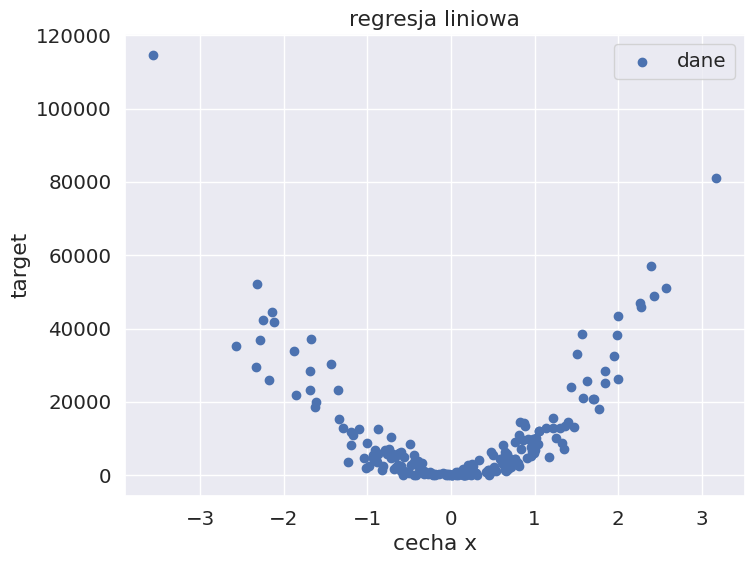

In [5]:
plt.figure(figsize=(8,6))
plt.title('regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

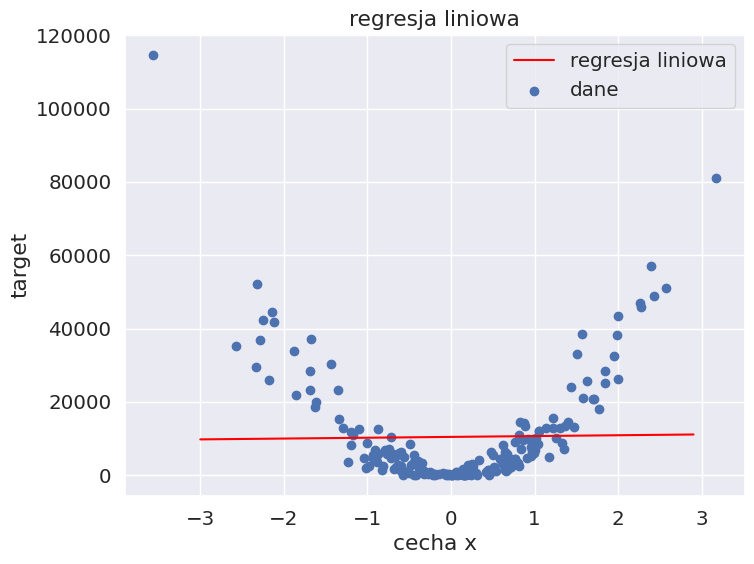

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

plot_data = np.arange(-3,3,0.1).reshape(-1,1)

plt.figure(figsize=(8,6))
plt.title('regresja liniowa')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

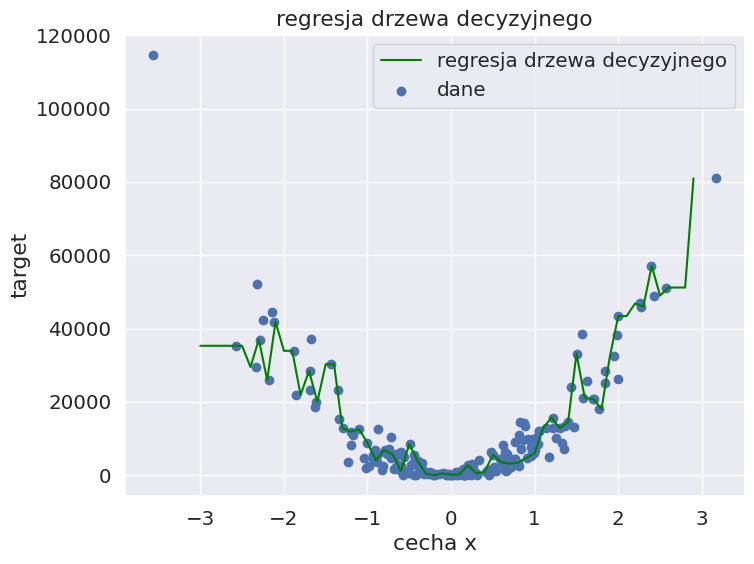

In [7]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(data, target)

plt.figure(figsize=(8,6))
plt.title('regresja drzewa decyzyjnego')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label=f'regresja drzewa decyzyjnego')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

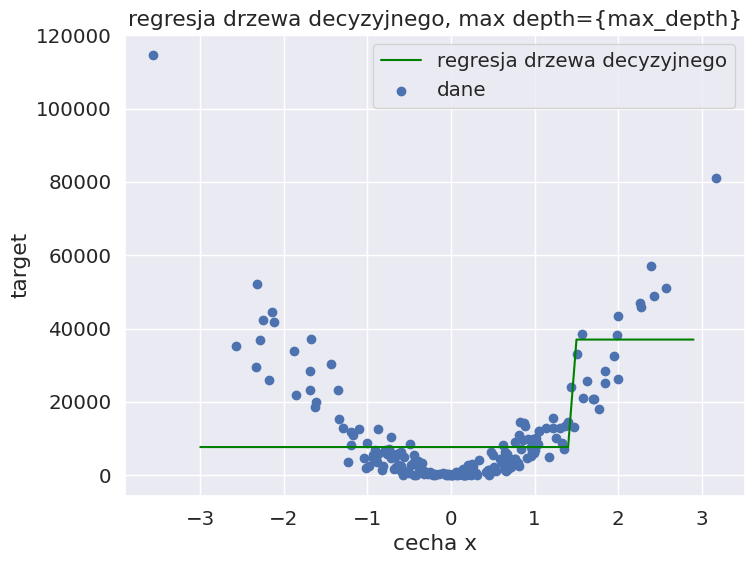

In [8]:
max_depth = 1
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data, target)

plt.figure(figsize=(8,6))
plt.title(f'regresja drzewa decyzyjnego, max depth={max_depth}')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label=f'regresja drzewa decyzyjnego')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

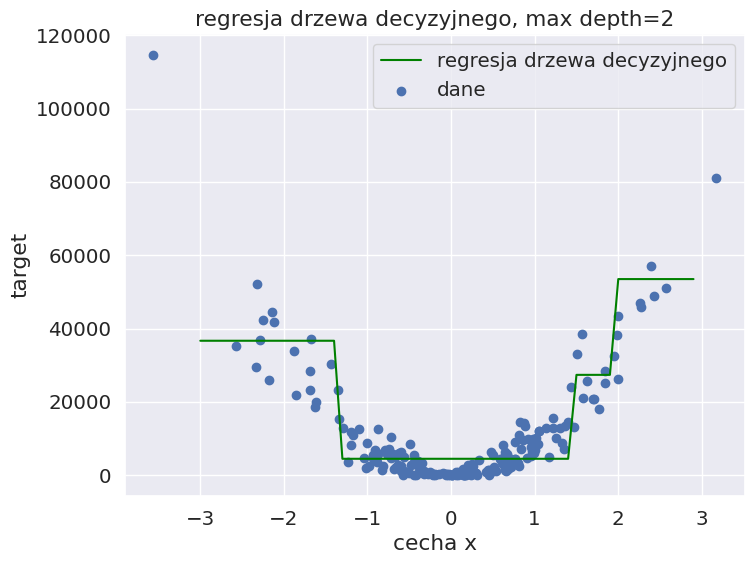

In [9]:
max_depth = 2
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data, target)

plt.figure(figsize=(8,6))
plt.title(f'regresja drzewa decyzyjnego, max depth={max_depth}')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label=f'regresja drzewa decyzyjnego')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

In [10]:
!pip install six

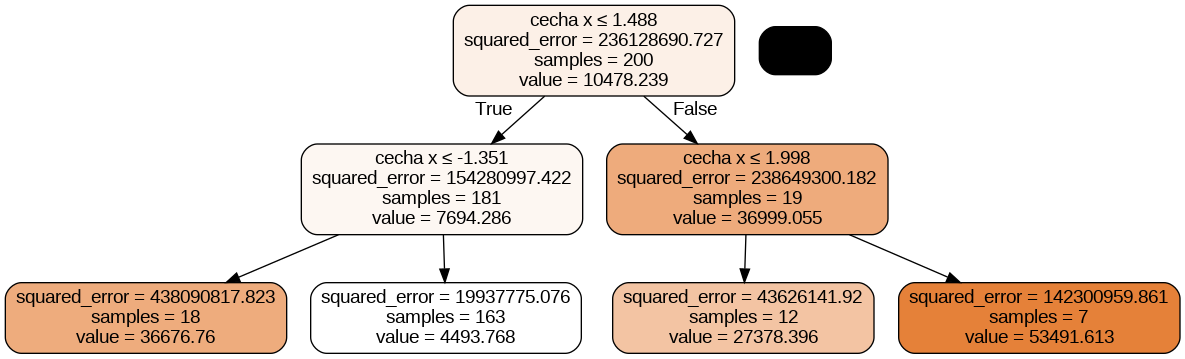

In [12]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')

Image(graph.create_png(), width=600)

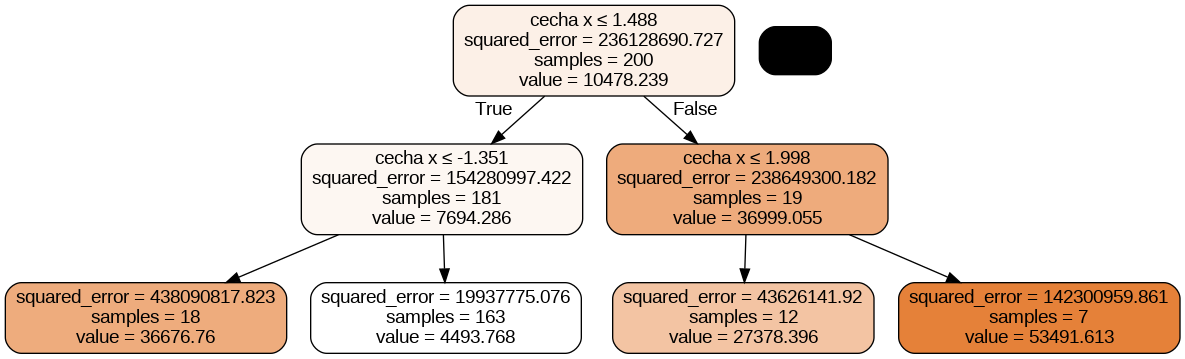

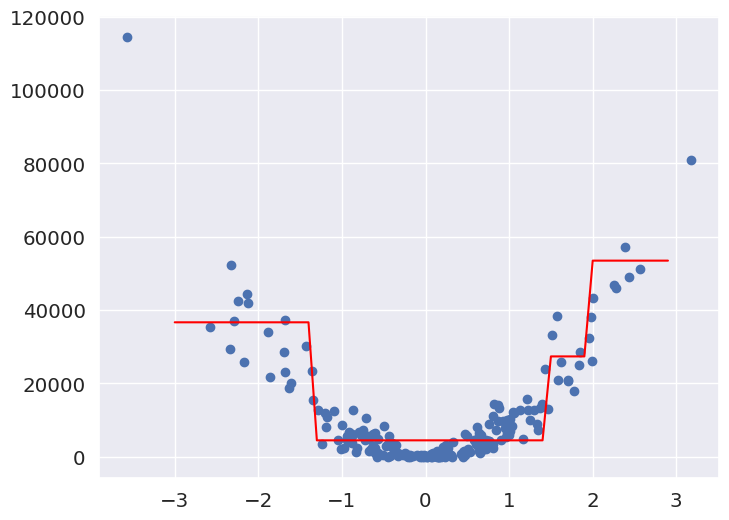

In [14]:
def make_dt_regression(max_depth=2):
  regressor = DecisionTreeRegressor(max_depth=max_depth)
  regressor.fit(data, target)

  plt.figure(figsize=(8,6))
  plt.plot(plot_data, regressor.predict(plot_data), c='red')
  plt.scatter(data, target)

  dot_data = StringIO()
  export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=['cecha x'])
  graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('graph.png')

  return Image(graph.create_png(), width=300 + max_depth * 100)

make_dt_regression(max_depth=2)

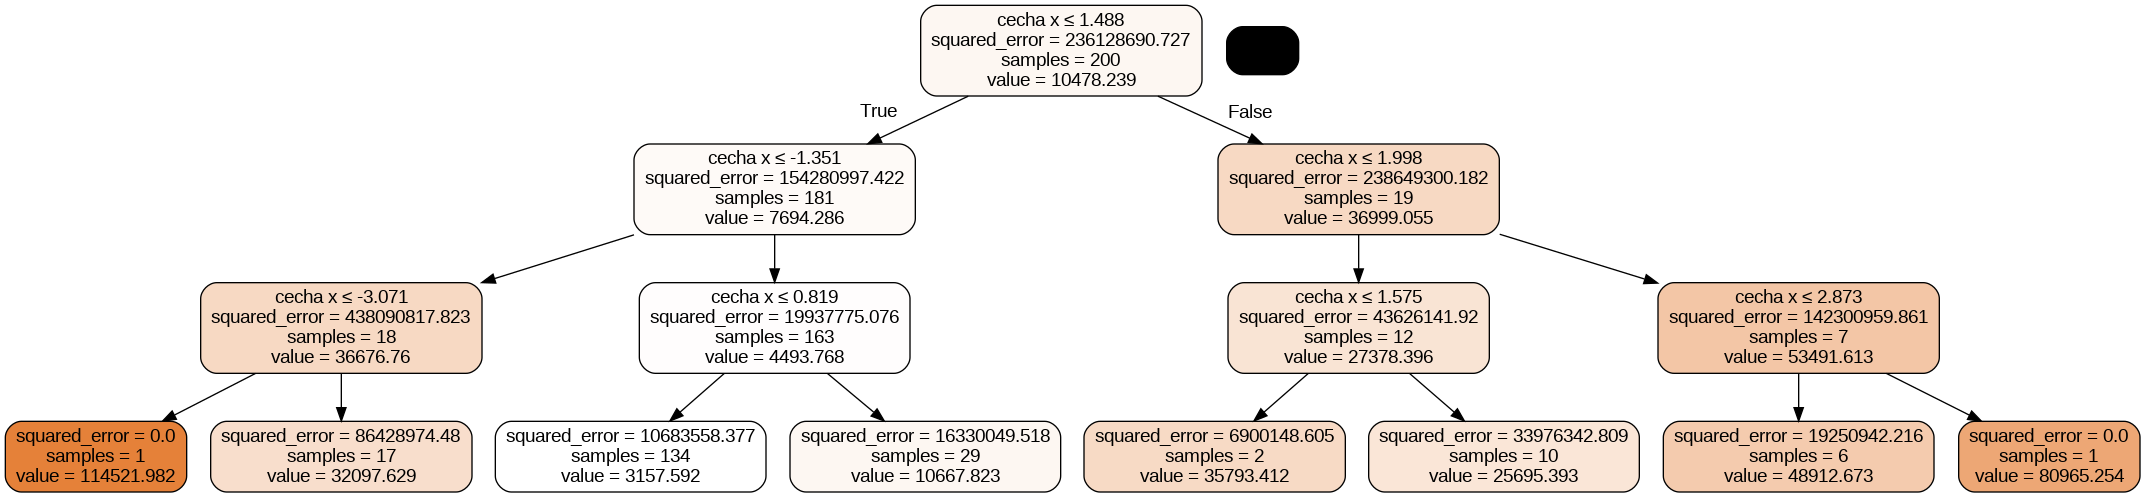

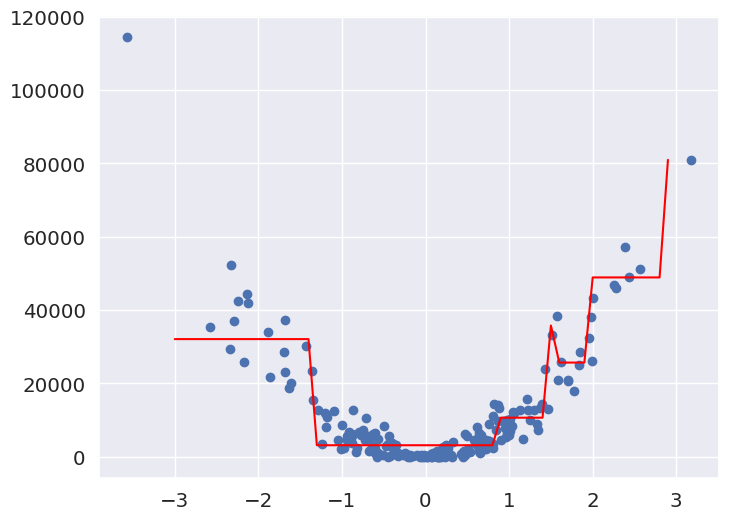

In [15]:
make_dt_regression(max_depth=3make_dt_regression(max_depth=2))

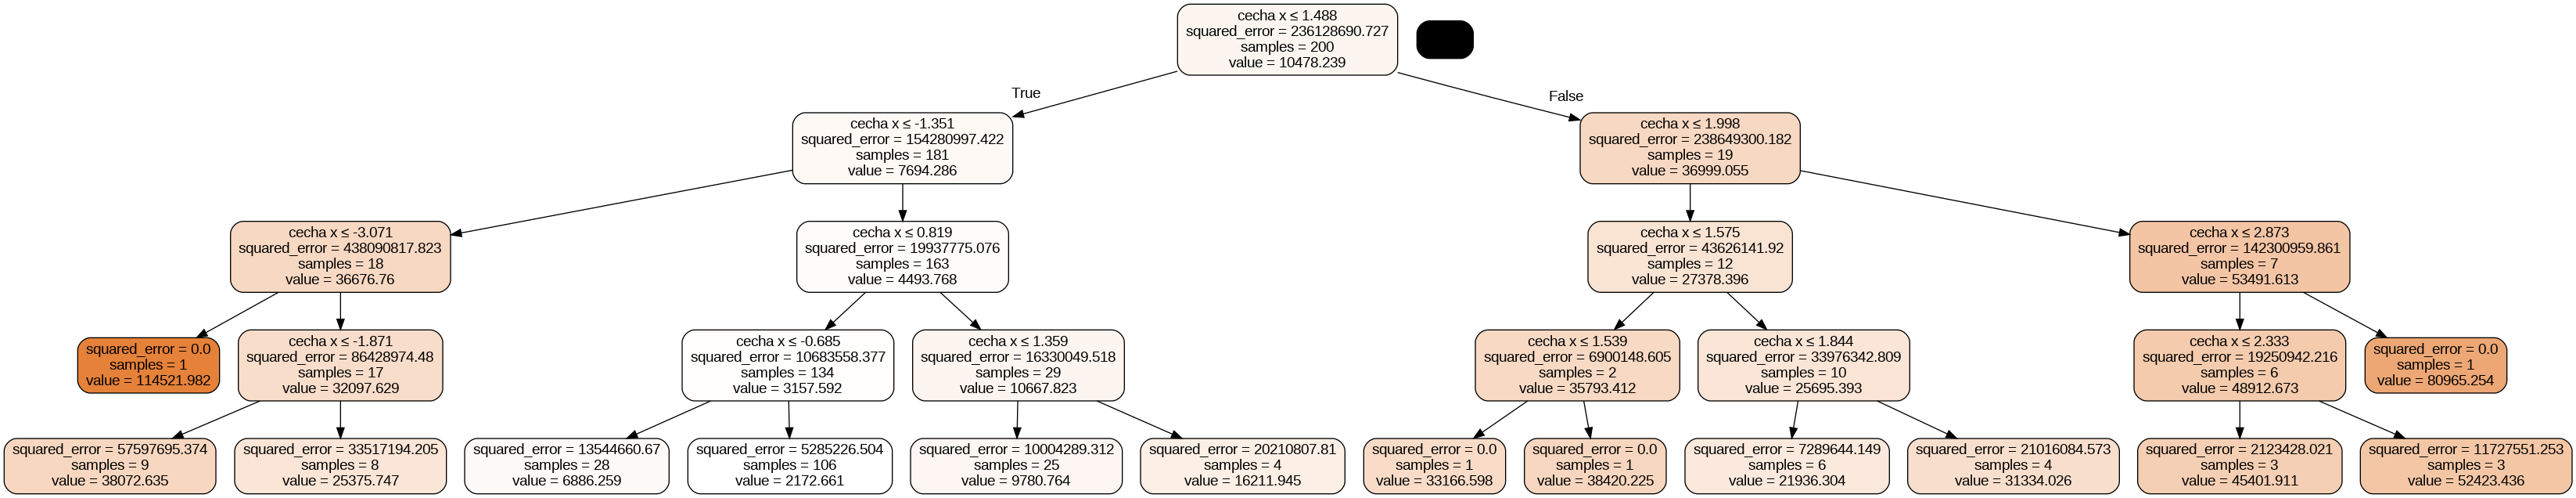

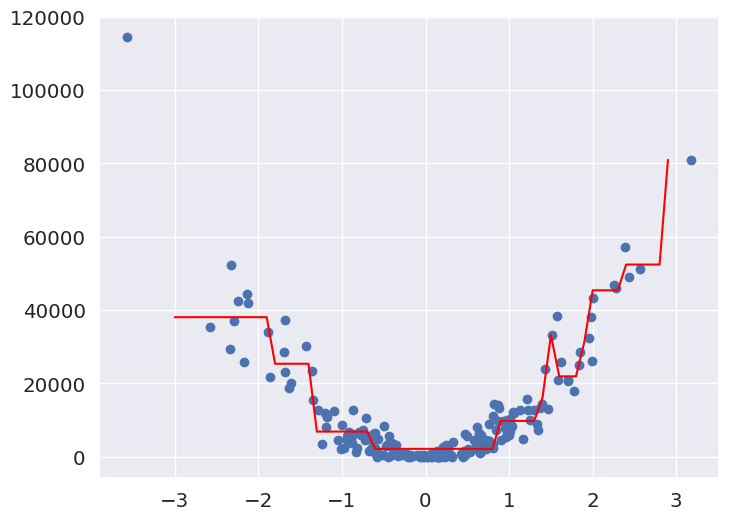

In [16]:
make_dt_regression(max_depth=4)